# 0. Set up

In [30]:
## Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Set paths
user = os.getenv('USERNAME')
shared_workspace = '/home/mdawkins/modelling_club'
user_dir = os.path.join(shared_workspace, user)
data_dir = os.path.join(shared_workspace, 'raw_data')
data_output_dir = os.path.join(shared_workspace, 'raw_data_lfs/engineered/bureau/')

# 1. Import data

In [3]:
home_loan_train = pd.read_csv(data_dir + '/raw/application_train.csv',index_col='SK_ID_CURR')
train_response = home_loan_train['TARGET']

home_loan_test = pd.read_csv(data_dir + '/raw/application_test_noTarget.csv',index_col='SK_ID_CURR')
home_loan_test.loc[:, 'TARGET'] = None

bureau = pd.read_csv(data_dir + '/raw/bureau.csv')
bureauBalance = pd.read_csv(data_dir + '/raw/bureau_balance.csv')

In [77]:
bureau[["SK_ID_BUREAU",'DAYS_CREDIT_UPDATE']][5057754]

,SK_ID_BUREAU,DAYS_CREDIT_UPDATE
0,5714462,-131
1,5714463,-20
2,5714464,-16
3,5714465,-16
4,5714466,-21
...,...,...
1465320,5057750,-19
1465321,5057754,-2493
1465322,5057762,-967
1465323,5057770,-1508


In [69]:
bureau["updated"] = bureau.groupby("SK_ID_BUREAU")['DAYS_CREDIT_UPDATE'].transform('max')

In [71]:
bureau[bureau['DAYS_CREDIT_UPDATE']!=bureau["updated"]]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,updated


In [55]:
bureau_recent = bureau[bureau['DAYS_CREDIT_UPDATE'] == bureau.groupby("SK_ID_BUREAU")['DAYS_CREDIT_UPDATE'].transform('max')]

In [57]:
bureau_recent.shape

(1465325, 17)

In [58]:
bureau.shape

(1465325, 17)

(array([  9449.,  10739.,  11721.,  12254.,  13142.,  11017.,  12103.,
         13671.,  14271.,  14303.,  15720.,  15408.,  16213.,  18427.,
         16501.,  15896.,  16202.,  15396.,  15975.,  16983.,  14730.,
         12910.,  13184.,  13633.,  13723.,  14361.,  14749.,  14064.,
         13818.,  13390.,  13350.,  13526.,  13113.,  12725.,  12673.,
         12948.,  13808.,  14101.,  14571.,  14211.,  14865.,  15889.,
         16908.,  17882.,  19417.,  21641.,  29441.,  55167., 158889.,
        243667.]),
 array([-999.  , -979.04, -959.08, -939.12, -919.16, -899.2 , -879.24,
        -859.28, -839.32, -819.36, -799.4 , -779.44, -759.48, -739.52,
        -719.56, -699.6 , -679.64, -659.68, -639.72, -619.76, -599.8 ,
        -579.84, -559.88, -539.92, -519.96, -500.  , -480.04, -460.08,
        -440.12, -420.16, -400.2 , -380.24, -360.28, -340.32, -320.36,
        -300.4 , -280.44, -260.48, -240.52, -220.56, -200.6 , -180.64,
        -160.68, -140.72, -120.76, -100.8 ,  -80.84,  -60.

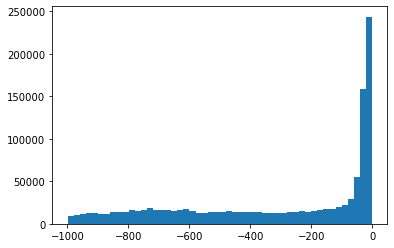

In [56]:
plt.hist(bureau_recent[(bureau_recent["DAYS_CREDIT_UPDATE"]>-1000)&(bureau_recent["DAYS_CREDIT_UPDATE"]<0)]["DAYS_CREDIT_UPDATE"],bins=50)

(array([  9449.,  10739.,  11721.,  12254.,  13142.,  11017.,  12103.,
         13671.,  14271.,  14303.,  15720.,  15408.,  16213.,  18427.,
         16501.,  15896.,  16202.,  15396.,  15975.,  16983.,  14730.,
         12910.,  13184.,  13633.,  13723.,  14361.,  14749.,  14064.,
         13818.,  13390.,  13350.,  13526.,  13113.,  12725.,  12673.,
         12948.,  13808.,  14101.,  14571.,  14211.,  14865.,  15889.,
         16908.,  17882.,  19417.,  21641.,  29441.,  55167., 158889.,
        243667.]),
 array([-999.  , -979.04, -959.08, -939.12, -919.16, -899.2 , -879.24,
        -859.28, -839.32, -819.36, -799.4 , -779.44, -759.48, -739.52,
        -719.56, -699.6 , -679.64, -659.68, -639.72, -619.76, -599.8 ,
        -579.84, -559.88, -539.92, -519.96, -500.  , -480.04, -460.08,
        -440.12, -420.16, -400.2 , -380.24, -360.28, -340.32, -320.36,
        -300.4 , -280.44, -260.48, -240.52, -220.56, -200.6 , -180.64,
        -160.68, -140.72, -120.76, -100.8 ,  -80.84,  -60.

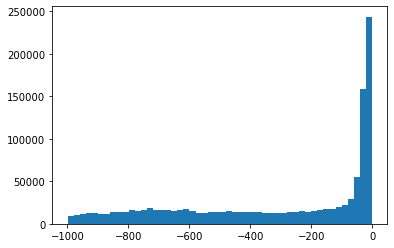

In [49]:
plt.hist(bureau[(bureau["DAYS_CREDIT_UPDATE"]>-1000)&(bureau["DAYS_CREDIT_UPDATE"]<0)]["DAYS_CREDIT_UPDATE"],bins=50)

In [53]:
bureauBalance["SK_ID_BUREAU"].shape[0]/bureauBalance["SK_ID_BUREAU"].unique().shape[0]

28.082503844206947

In [51]:
bureauBalance["SK_ID_BUREAU"].shape[0]

14701612

In [26]:
bureauBalance["SK_ID_BUREAU"].unique().shape[0] / bureau["SK_ID_BUREAU"].unique().shape[0]

0.35726886526879703

In [34]:
Active_CreditCardBalance = Active_CreditCard.merge(bureauBalance, on='SK_ID_BUREAU')

In [36]:
Active_CreditCardBalance

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.00,67500.00,0.0,Credit card,-183,0.0,0,C
1,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.00,67500.00,0.0,Credit card,-183,0.0,-1,C
2,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.00,67500.00,0.0,Credit card,-183,0.0,-2,C
3,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.00,67500.00,0.0,Credit card,-183,0.0,-3,C
4,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.00,67500.00,0.0,Credit card,-183,0.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835219,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-10,0
1835220,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-11,0
1835221,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-12,0
1835222,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-13,0


In [38]:
Active_CreditCardBalance[Active_CreditCardBalance["SK_ID_BUREAU"]==5053730]	

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
1835209,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,0,C
1835210,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-1,C
1835211,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-2,C
1835212,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-3,0
1835213,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-4,0
1835214,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-5,0
1835215,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-6,0
1835216,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-7,0
1835217,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-8,0
1835218,229054,5053730,Active,currency 1,-456,0,1372.0,NaN,0.0,0,67500.0,63530.46,3969.54,0.0,Credit card,-3,NaN,-9,0


(array([ 1122.,  1143.,  1176.,  1273.,  1191.,  1215.,  1140.,  1097.,
         1009.,   939.,  1067.,   971.,   931.,   670.,   559.,   629.,
          780.,   938.,  1126.,  1388.,  1816.,  2119.,  2674.,  2901.,
         3327.,  3996.,  4069.,  4533.,  4832.,  5423.,  5848.,  5982.,
         6370.,  6646.,  7216.,  8099.,  8497.,  9231.,  9249.,  9825.,
        10275., 11662., 12062., 12470., 12774., 13113., 13032., 12136.,
        10133.,  5678.]),
 array([-2.9220e+03, -2.8636e+03, -2.8052e+03, -2.7468e+03, -2.6884e+03,
        -2.6300e+03, -2.5716e+03, -2.5132e+03, -2.4548e+03, -2.3964e+03,
        -2.3380e+03, -2.2796e+03, -2.2212e+03, -2.1628e+03, -2.1044e+03,
        -2.0460e+03, -1.9876e+03, -1.9292e+03, -1.8708e+03, -1.8124e+03,
        -1.7540e+03, -1.6956e+03, -1.6372e+03, -1.5788e+03, -1.5204e+03,
        -1.4620e+03, -1.4036e+03, -1.3452e+03, -1.2868e+03, -1.2284e+03,
        -1.1700e+03, -1.1116e+03, -1.0532e+03, -9.9480e+02, -9.3640e+02,
        -8.7800e+02, -8.1960e+0

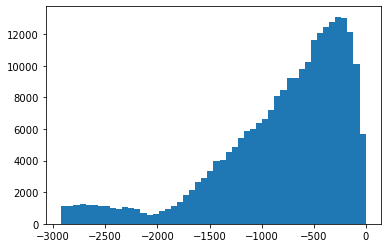

In [32]:
plt.hist(Active_CreditCard["DAYS_CREDIT"],bins=50)

In [20]:
Active_CreditCard.head() #[bureau["SK_ID_BUREAU"]==5715448]	

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.0,0.00,0.00,0.0,Credit card,-690,NaN
10,162297,5714472,Active,currency 1,-1146,0,-180.0,NaN,0.0,0,337500.0,0.00,0.00,0.0,Credit card,-690,NaN


# 2. Cleaning

In [4]:
bureau = bureau[bureau["CREDIT_CURRENCY"]=='currency 1']
bureau = bureau.drop("CREDIT_CURRENCY",axis=1)

# 3. Bad Debt

In [5]:
Bad_Debt = bureau[["SK_ID_CURR","CREDIT_ACTIVE"]][bureau["CREDIT_ACTIVE"]=="Bad debt"].groupby("SK_ID_CURR").count().rename(columns={"CREDIT_ACTIVE":"BAD_DEBT"})
Bad_Debt.to_pickle(data_output_dir + 'Bad_Debt.pkl')

# 4. Active and Closed Debt

In [19]:
## Consumer Credit
Active_ConsumerCredit = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Active') & (bureau["CREDIT_TYPE"] == "Consumer credit")]
Closed_ConsumerCredit = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Closed') & (bureau["CREDIT_TYPE"] == "Consumer credit")]
## Credit Card
Active_CreditCard = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Active') & (bureau["CREDIT_TYPE"] == "Credit card")]
Closed_CreditCard = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Closed') & (bureau["CREDIT_TYPE"] == "Credit card")]
## Mortgage
Active_Mortgage = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Active') & (bureau["CREDIT_TYPE"] == "Mortgage")]
Closed_Mortgage = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Closed') & (bureau["CREDIT_TYPE"] == "Mortgage")]
## Other
Active_Other = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Active') & ~(bureau["CREDIT_TYPE"].isin(["Consumer credit","Credit card","Mortgage"]))]
Closed_Other = bureau.loc[(bureau["CREDIT_ACTIVE"] == 'Closed') & ~(bureau["CREDIT_TYPE"].isin(["Consumer credit","Credit card","Mortgage"]))]

### Active Consumer Credit

In [8]:
def conCred_year_brackets(year):
    if (year >= -1): return 1
    elif (year >= -2): return 2
    else: return 3

In [9]:
Active_ConsumerCredit = Active_ConsumerCredit.drop(["DAYS_ENDDATE_FACT","CREDIT_ACTIVE","CREDIT_TYPE"],axis=1)
Active_ConsumerCredit = Active_ConsumerCredit.sort_values(["SK_ID_CURR","DAYS_CREDIT","DAYS_CREDIT_UPDATE"])
Active_ConsumerCredit = Active_ConsumerCredit.drop_duplicates(subset=["SK_ID_CURR", "DAYS_CREDIT"], keep='last')
Active_ConsumerCredit["YEARS_CREDIT"] = Active_ConsumerCredit["DAYS_CREDIT"]/365
Active_ConsumerCredit["DATE_RANGE"] = Active_ConsumerCredit["YEARS_CREDIT"].apply(conCred_year_brackets)

In [10]:
Active_ConsumerCredit_Agg = Active_ConsumerCredit.groupby(["SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [11]:
Active_ConsumerCredit_Agg.to_pickle(data_output_dir + "Active_ConsumerCredit_Agg.pkl")

In [13]:
Active_ConsumerCredit_Agg_Date = Active_ConsumerCredit.groupby(["DATE_RANGE","SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [14]:
Active_ConsumerCredit_Agg_Date.to_pickle(data_output_dir + "Active_ConsumerCredit_Agg_Date.pkl")

### Closed Consumer Credit

In [16]:
def closedConCred_year_brackets(year):
    if (year >= -2): return 1
    elif (year >= -4): return 2
    else: return 3

In [17]:
Closed_ConsumerCredit = Closed_ConsumerCredit.drop(["CREDIT_ACTIVE","CREDIT_TYPE"],axis=1)
Closed_ConsumerCredit = Closed_ConsumerCredit.sort_values(["SK_ID_CURR","DAYS_CREDIT","DAYS_CREDIT_UPDATE"])
Closed_ConsumerCredit = Closed_ConsumerCredit.drop_duplicates(subset=["SK_ID_CURR", "DAYS_CREDIT"], keep='last')
Closed_ConsumerCredit["YEARS_ENDDATE_FACT"] = Closed_ConsumerCredit["DAYS_ENDDATE_FACT"]/365
Closed_ConsumerCredit["DATE_RANGE"] = Closed_ConsumerCredit["YEARS_ENDDATE_FACT"].apply(closedConCred_year_brackets)

In [18]:
Closed_ConsumerCredit_Agg = Closed_ConsumerCredit.groupby(["SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [19]:
Closed_ConsumerCredit_Agg.to_pickle(data_output_dir + "Closed_ConsumerCredit_Agg.pkl")

In [21]:
Closed_ConsumerCredit_Agg_Date = Closed_ConsumerCredit.groupby(["DATE_RANGE","SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [22]:
Closed_ConsumerCredit_Agg_Date.to_pickle(data_output_dir + "Closed_ConsumerCredit_Agg_Date.pkl")

### Active Credit Card

In [24]:
def credCard_year_brackets(year):
    if (year >= -1): return 1
    elif (year >= -2): return 2
    elif (year >= -4): return 3
    else: return 4

In [18]:
Active_CreditCard = Active_CreditCard.drop(["DAYS_ENDDATE_FACT","CREDIT_ACTIVE","CREDIT_TYPE"],axis=1)
Active_CreditCard = Active_CreditCard.sort_values(["SK_ID_CURR","DAYS_CREDIT","DAYS_CREDIT_UPDATE"])
Active_CreditCard = Active_CreditCard.drop_duplicates(subset=["SK_ID_CURR", "DAYS_CREDIT"], keep='last')
Active_CreditCard["YEARS_CREDIT"] = Active_CreditCard["DAYS_CREDIT"]/365
Active_CreditCard["DATE_RANGE"] = Active_CreditCard["YEARS_CREDIT"].apply(credCard_year_brackets)

NameError: name 'Active_CreditCard' is not defined

In [26]:
Active_CreditCard_Agg = Active_CreditCard.groupby(["SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         AMT_CREDIT_SUM_LIMIT=('AMT_CREDIT_SUM_LIMIT', sum),
         AMT_CREDIT_SUM_LIMIT_MAX=('AMT_CREDIT_SUM_LIMIT', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [27]:
Active_CreditCard_Agg.to_pickle(data_output_dir + "Active_CreditCard_Agg.pkl")

In [29]:
Active_CreditCard_Agg_Date = Active_CreditCard.groupby(["DATE_RANGE","SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         AMT_CREDIT_SUM_LIMIT=('AMT_CREDIT_SUM_LIMIT', sum),
         AMT_CREDIT_SUM_LIMIT_MAX=('AMT_CREDIT_SUM_LIMIT', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [30]:
Active_CreditCard_Agg_Date.to_pickle(data_output_dir + "Active_CreditCard_Agg_Date.pkl")

### Closed Credit Card

In [32]:
def closedCredCard_year_brackets(year):
    if (year >= -1): return 1
    elif (year >= -2): return 2
    elif (year >= -4): return 3
    else: return 4

In [33]:
Closed_CreditCard = Closed_CreditCard.drop(["CREDIT_ACTIVE","CREDIT_TYPE"],axis=1)
Closed_CreditCard = Closed_CreditCard.sort_values(["SK_ID_CURR","DAYS_CREDIT","DAYS_CREDIT_UPDATE"])
Closed_CreditCard = Closed_CreditCard.drop_duplicates(subset=["SK_ID_CURR", "DAYS_CREDIT"], keep='last')
Closed_CreditCard["YEARS_ENDDATE_FACT"] = Closed_CreditCard["DAYS_ENDDATE_FACT"]/365
Closed_CreditCard["DATE_RANGE"] = Closed_CreditCard["YEARS_ENDDATE_FACT"].apply(closedCredCard_year_brackets)

In [34]:
Closed_CreditCard_Agg = Closed_CreditCard.groupby(["SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_LIMIT=('AMT_CREDIT_SUM_LIMIT', sum),
         AMT_CREDIT_SUM_LIMIT_MAX=('AMT_CREDIT_SUM_LIMIT', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [35]:
Closed_CreditCard_Agg.to_pickle(data_output_dir + "Closed_CreditCard_Agg.pkl")

In [37]:
Closed_CreditCard_Agg_Date = Closed_CreditCard.groupby(["DATE_RANGE","SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         CNT_CREDIT_PROLONG=('CNT_CREDIT_PROLONG', sum),
         CNT_CREDIT_PROLONG_MAX=('CNT_CREDIT_PROLONG', max),
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_LIMIT=('AMT_CREDIT_SUM_LIMIT', sum),
         AMT_CREDIT_SUM_LIMIT_MAX=('AMT_CREDIT_SUM_LIMIT', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [38]:
Closed_CreditCard_Agg_Date.to_pickle(data_output_dir + "Closed_CreditCard_Agg_Date.pkl")

### Active_Mortgage

In [40]:
Active_Mortgage = Active_Mortgage.drop(["DAYS_ENDDATE_FACT","CREDIT_ACTIVE","CREDIT_TYPE"],axis=1)
Active_Mortgage["COUNT"] = Active_Mortgage[["SK_ID_CURR","SK_ID_BUREAU"]].groupby("SK_ID_CURR").transform('count')

In [47]:
Active_Mortgage_Singl = Active_Mortgage[Active_Mortgage["COUNT"]<=1]
Active_Mortgage_Dupes = Active_Mortgage[Active_Mortgage["COUNT"]>1]
Active_Mortgage_Dupes["COUNT"] = Active_Mortgage_Dupes[["SK_ID_CURR","SK_ID_BUREAU"]].groupby('SK_ID_CURR').transform('count') 
Active_Mortgage_Dupes = Active_Mortgage_Dupes[Active_Mortgage_Dupes['DAYS_CREDIT_UPDATE'] == Active_Mortgage_Dupes.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].transform('min')]
Active_Mortgage_Dupes = Active_Mortgage_Dupes[Active_Mortgage_Dupes['DAYS_CREDIT'] == Active_Mortgage_Dupes.groupby('SK_ID_CURR')['DAYS_CREDIT'].transform('min')]
Active_Mortgage_Dupes = Active_Mortgage_Dupes[Active_Mortgage_Dupes['AMT_CREDIT_SUM'] == Active_Mortgage_Dupes.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].transform('max')]
Active_Mortgage_Dupes = Active_Mortgage_Dupes[Active_Mortgage_Dupes["DAYS_CREDIT_ENDDATE"].notnull()]
Active_Mortgage_Dupes = Active_Mortgage_Dupes.drop_duplicates(subset=['SK_ID_CURR'])
Active_Mortgage_Clean = pd.concat([Active_Mortgage_Singl, Active_Mortgage_Dupes])
Active_Mortgage_Clean = Active_Mortgage_Clean.set_index("SK_ID_CURR")
Active_Mortgage_Clean = Active_Mortgage_Clean.drop(["SK_ID_BUREAU"],axis=1)

/home/mdawkins/jupyter/conda/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
Active_Mortgage_Clean.to_pickle(data_output_dir + "Active_Mortgage_Clean.pkl")

### Closed_Mortgage

In [50]:
Closed_Mortgage = Closed_Mortgage.drop(["CREDIT_ACTIVE","CREDIT_TYPE"],axis=1)
Closed_Mortgage["COUNT"] = Closed_Mortgage[["SK_ID_CURR","SK_ID_BUREAU"]].groupby("SK_ID_CURR").transform('count')

In [54]:
Closed_Mortgage_Singl = Closed_Mortgage[Closed_Mortgage["COUNT"]<=1]
Closed_Mortgage_Dupes = Closed_Mortgage[Closed_Mortgage["COUNT"]>1]
Closed_Mortgage_Dupes["COUNT"] = Closed_Mortgage_Dupes[["SK_ID_CURR","SK_ID_BUREAU"]].groupby('SK_ID_CURR').transform('count') 
Closed_Mortgage_Dupes = Closed_Mortgage_Dupes[Closed_Mortgage_Dupes['DAYS_CREDIT_UPDATE'] == Closed_Mortgage_Dupes.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].transform('min')]
Closed_Mortgage_Dupes = Closed_Mortgage_Dupes[Closed_Mortgage_Dupes['DAYS_ENDDATE_FACT'] == Closed_Mortgage_Dupes.groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].transform('min')]
Closed_Mortgage_Dupes = Closed_Mortgage_Dupes[Closed_Mortgage_Dupes['AMT_CREDIT_SUM'] == Closed_Mortgage_Dupes.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].transform('max')]
Closed_Mortgage_Dupes = Closed_Mortgage_Dupes.drop_duplicates(subset=['SK_ID_CURR'])
Closed_Mortgage_Clean = pd.concat([Closed_Mortgage_Singl, Closed_Mortgage_Dupes])
Closed_Mortgage_Clean = Closed_Mortgage_Clean.set_index("SK_ID_CURR")
Closed_Mortgage_Clean = Closed_Mortgage_Clean.drop(["SK_ID_BUREAU"],axis=1)

/home/mdawkins/jupyter/conda/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
Closed_Mortgage_Clean.to_pickle(data_output_dir + "Closed_Mortgage_Clean.pkl")

### Active Other

In [57]:
def other_year_brackets(year):
    if (year >= -1): return 1
    elif (year >= -2): return 2
    else: return 3

In [58]:
Active_Other = Active_Other.drop(["DAYS_ENDDATE_FACT","CREDIT_ACTIVE"],axis=1)
Active_Other = Active_Other.sort_values(["SK_ID_CURR","DAYS_CREDIT","DAYS_CREDIT_UPDATE"])
Active_Other = Active_Other.drop_duplicates(subset=["SK_ID_CURR", "DAYS_CREDIT"], keep='last')
Active_Other["YEARS_CREDIT"] = Active_Other["DAYS_CREDIT"]/365
Active_Other["DATE_RANGE"] = Active_Other["YEARS_CREDIT"].apply(other_year_brackets)

In [59]:
Active_Other_Agg = Active_Other.groupby(["SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         AMT_ANNUITY=('AMT_ANNUITY', sum),
         AMT_ANNUITY_MAX=('AMT_ANNUITY', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [60]:
Active_Other_Agg.to_pickle(data_output_dir + "Active_Other_Agg.pkl")

In [62]:
Active_Other_Agg_Date = Active_Other.groupby(["DATE_RANGE","SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         AMT_ANNUITY_DEBT=('AMT_ANNUITY', sum),
         AMT_ANNUITY_DEBT_MAX=('AMT_ANNUITY', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [63]:
Active_Other_Agg_Date.to_pickle(data_output_dir + "Active_Other_Agg_Date.pkl")

### Closed Other

In [65]:
def closedOther_year_brackets(year):
    if (year >= -2): return 1
    elif (year >= -4): return 2
    else: return 3

In [66]:
Closed_Other = Closed_Other.drop(["CREDIT_ACTIVE"],axis=1)
Closed_Other = Closed_Other.sort_values(["SK_ID_CURR","DAYS_CREDIT","DAYS_CREDIT_UPDATE"])
Closed_Other = Closed_Other.drop_duplicates(subset=["SK_ID_CURR", "DAYS_CREDIT"], keep='last')
Closed_Other["YEARS_CREDIT"] = Closed_Other["DAYS_ENDDATE_FACT"]/365
Closed_Other["DATE_RANGE"] = Closed_Other["YEARS_CREDIT"].apply(closedOther_year_brackets)

In [67]:
Closed_Other_Agg = Closed_Other.groupby(["SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         AMT_ANNUITY_DEBT=('AMT_ANNUITY', sum),
         AMT_ANNUITY_DEBT_MAX=('AMT_ANNUITY', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [68]:
Closed_Other_Agg.to_pickle(data_output_dir + "Closed_Other_Agg.pkl")

In [70]:
Closed_Other_Agg_Date = Closed_Other.groupby(["DATE_RANGE","SK_ID_CURR"]).agg(
         AMT_CREDIT_MAX_OVERDUE=('AMT_CREDIT_MAX_OVERDUE', max), 
         AMT_CREDIT_SUM=('AMT_CREDIT_SUM', sum),
         AMT_CREDIT_SUM_MAX=('AMT_CREDIT_SUM', max),
         AMT_CREDIT_SUM_DEBT=('AMT_CREDIT_SUM_DEBT', sum),
         AMT_CREDIT_SUM_DEBT_MAX=('AMT_CREDIT_SUM_DEBT', max),
         AMT_ANNUITY_DEBT=('AMT_ANNUITY', sum),
         AMT_ANNUITY_DEBT_MAX=('AMT_ANNUITY', max),
         COUNT=('SK_ID_BUREAU',len)
        )

In [71]:
Closed_Other_Agg_Date.to_pickle(data_output_dir + "Closed_Other_Agg_Date.pkl")

# 5. Sold debt

In [73]:
bureau_sold_debt = bureau[bureau["CREDIT_ACTIVE"]=='Sold']
bureau_sold_debt = bureau_sold_debt.sort_values(["SK_ID_CURR","DAYS_CREDIT","DAYS_CREDIT_UPDATE"])
bureau_sold_debt = bureau_sold_debt.drop_duplicates(subset=["SK_ID_CURR", "DAYS_CREDIT"], keep='last')
bureau_sold_debt = bureau_sold_debt.drop(["SK_ID_BUREAU"],axis=1)

In [77]:
bureau_sold_debt_agg = bureau_sold_debt.groupby('SK_ID_CURR', as_index = False).agg(['mean', 'max', 'min', 'sum', 'count'])

In [78]:
bureau_sold_debt_agg.columns = [''.join(col).strip() for col in bureau_sold_debt_agg.columns.values]

In [80]:
bureau_sold_debt_agg.to_pickle(data_output_dir + "Sold_Agg.pkl")